In [2]:
import glob
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
# Specify correct location where datasets are stored
path = r'C:\Users\I539797\Documents\GitHub\UberMovementDataDownloadBot\Datasets\Atlanta'

In [4]:
# Merge/Concatenate all datasets into one
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(r'C:\Users\I539797\Documents\GitHub\UberMovementDataDownloadBot\Datasets\Atlanta', "*.csv"))))

In [5]:
df.head(10)

Origin Movement ID Origin Display Name Destination Movement ID  \
0               1074  Traffic Zone 02047                      28   
1               1074  Traffic Zone 02047                      29   
2               1074  Traffic Zone 02047                      35   
3               1074  Traffic Zone 02047                      43   
4               1074  Traffic Zone 02047                      48   
5               1074  Traffic Zone 02047                      64   
6               1074  Traffic Zone 02047                      70   
7               1074  Traffic Zone 02047                      74   
8               1074  Traffic Zone 02047                      80   
9               1074  Traffic Zone 02047                      89   

  Destination Display Name                                     Date Range  \
0       Traffic Zone 16024  1/4/2016 - 1/4/2016, Every day, Daily Average   
1       Traffic Zone 16025  1/4/2016 - 1/4/2016, Every day, Daily Average   
2       Traffic Zone 14080  1/4/2016 - 1/4/2016, Every day, Daily Average   
3       Traffic Zone 14072  1/4/2016 - 1/4/2016, Every day, Daily Average   
4       Traffic Zone 16027  1/4/2016 - 1/4/2016, Every day, Daily Average   
5       Traffic Zone 14081  1/4/2016 - 1/4/2016, Every day, Daily Average   
6       Traffic Zone 04118  1/4/2016 - 1/4/2016, Every day, Daily Average   
7       Traffic Zone 04116  1/4/2016 - 1/4/2016, Every day, Daily Average   
8       Traffic Zone 14073  1/4/2016 - 1/4/2016, Every day, Daily Average   
9       Traffic Zone 04119  1/4/2016 - 1/4/2016, Every day, Daily Average   

  Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
0                       2296                                      1593   
1                       2378                                      1662   
2                       1846                                      1703   
3                       1797                                      1647   
4                       2301                                      1670   
5                       1672                                      1535   
6                       1871                                      1458   
7                       1967                                      1403   
8                       1713                                      1572   
9                       1942                                      1704   

  Range - Upper Bound Travel Time (Seconds)  
0                                      3309  
1                                      3402  
2                                      2000  
3                                      1959  
4                                      3168  
5                                      1820  
6                                      2399  
7                                      2757  
8                                      1866  
9                                      2212

In [6]:
# Create a numeric index, because the existing index will be replaced by the Date Range later
df['Numeric Index'] = range(len(df))

# Reorder columns
df = df[['Numeric Index',
         'Origin Movement ID',
         'Origin Display Name',
         'Destination Movement ID',
         'Destination Display Name',
         'Date Range',
         'Mean Travel Time (Seconds)',
         'Range - Lower Bound Travel Time (Seconds)',
         'Range - Upper Bound Travel Time (Seconds)',
        ]]

In [7]:
# Reformat date and sort values by date
df['Date Range'] = pd.to_datetime(df['Date Range'].str.split().str[0], format='%m/%d/%Y')
df = df.sort_values('Date Range')

df.head()

Numeric Index Origin Movement ID Origin Display Name  \
546        1593391               1074  Traffic Zone 02047   
170        1593015               1074  Traffic Zone 02047   
171        1593016               1074  Traffic Zone 02047   
172        1593017               1074  Traffic Zone 02047   
173        1593018               1074  Traffic Zone 02047   

    Destination Movement ID Destination Display Name Date Range  \
546                    1431       Traffic Zone 10011 2016-01-02   
170                     761       Traffic Zone 07195 2016-01-02   
171                     766       Traffic Zone 06075 2016-01-02   
172                     767       Traffic Zone 06066 2016-01-02   
173                     768       Traffic Zone 02141 2016-01-02   

    Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
546                       1400                                      1055   
170                       1095                                       845   
171                       1647                                      1223   
172                       1298                                      1124   
173                       1033                                       744   

    Range - Upper Bound Travel Time (Seconds)  
546                                      1856  
170                                      1417  
171                                      2217  
172                                      1498  
173                                      1432

In [8]:
# Renaming 'Date Range' column to 'Date'
df = df.rename(columns={"Date Range": "Date"})

# Deleting columns that are not helpful for the analysis
df.drop('Origin Display Name', axis=1, inplace=True)
df.drop('Destination Display Name', axis=1, inplace=True)

In [9]:
df.head()

Numeric Index Origin Movement ID Destination Movement ID       Date  \
546        1593391               1074                    1431 2016-01-02   
170        1593015               1074                     761 2016-01-02   
171        1593016               1074                     766 2016-01-02   
172        1593017               1074                     767 2016-01-02   
173        1593018               1074                     768 2016-01-02   

    Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
546                       1400                                      1055   
170                       1095                                       845   
171                       1647                                      1223   
172                       1298                                      1124   
173                       1033                                       744   

    Range - Upper Bound Travel Time (Seconds)  
546                                      1856  
170                                      1417  
171                                      2217  
172                                      1498  
173                                      1432

In [10]:
df.set_index(df['Date'])

Numeric Index Origin Movement ID Destination Movement ID  \
Date                                                                   
2016-01-02        1593391               1074                    1431   
2016-01-02        1593015               1074                     761   
2016-01-02        1593016               1074                     766   
2016-01-02        1593017               1074                     767   
2016-01-02        1593018               1074                     768   
...                   ...                ...                     ...   
2020-03-31        1592751               1074                    1178   
2020-03-31        1592752               1074                    1179   
2020-03-31        1592753               1074                    1180   
2020-03-31        1592741               1074                    1162   
2020-03-31        1592422               1074                     411   

                 Date Mean Travel Time (Seconds)  \
Date                                               
2016-01-02 2016-01-02                       1400   
2016-01-02 2016-01-02                       1095   
2016-01-02 2016-01-02                       1647   
2016-01-02 2016-01-02                       1298   
2016-01-02 2016-01-02                       1033   
...               ...                        ...   
2020-03-31 2020-03-31                        780   
2020-03-31 2020-03-31                        878   
2020-03-31 2020-03-31                        568   
2020-03-31 2020-03-31                        352   
2020-03-31 2020-03-31                       1546   

           Range - Lower Bound Travel Time (Seconds)  \
Date                                                   
2016-01-02                                      1055   
2016-01-02                                       845   
2016-01-02                                      1223   
2016-01-02                                      1124   
2016-01-02                                       744   
...                                              ...   
2020-03-31                                       680   
2020-03-31                                       767   
2020-03-31                                       445   
2020-03-31                                       214   
2020-03-31                                      1352   

           Range - Upper Bound Travel Time (Seconds)  
Date                                                  
2016-01-02                                      1856  
2016-01-02                                      1417  
2016-01-02                                      2217  
2016-01-02                                      1498  
2016-01-02                                      1432  
...                                              ...  
2020-03-31                                       893  
2020-03-31                                      1003  
2020-03-31                                       724  
2020-03-31                                       576  
2020-03-31                                      1766  

[1593392 rows x 7 columns]

In [11]:
# Count how many recorded trips each date had
df['Date'].value_counts()

2018-09-28    2142
2018-05-25    2102
2018-07-13    2074
2018-08-16    2054
2018-05-24    2044
              ... 
2016-01-12     504
2020-03-24     494
2020-03-30     491
2020-03-29     484
2020-03-31     465
Name: Date, Length: 1541, dtype: int64

In [12]:
# This date, for example, had no recorded trips (2018-10-27 also has no data)
print(df.loc[df['Date'] == '2018-10-28'])

Empty DataFrame
Columns: [Numeric Index, Origin Movement ID, Destination Movement ID, Date, Mean Travel Time (Seconds), Range - Lower Bound Travel Time (Seconds), Range - Upper Bound Travel Time (Seconds)]
Index: []


In [13]:
# Print number of trips recorder in each day
print(df['Date'].value_counts())

2018-09-28    2142
2018-05-25    2102
2018-07-13    2074
2018-08-16    2054
2018-05-24    2044
              ... 
2016-01-12     504
2020-03-24     494
2020-03-30     491
2020-03-29     484
2020-03-31     465
Name: Date, Length: 1541, dtype: int64


1541
1541


Text(0, 0.5, 'Daily Number of Recorded Trips')

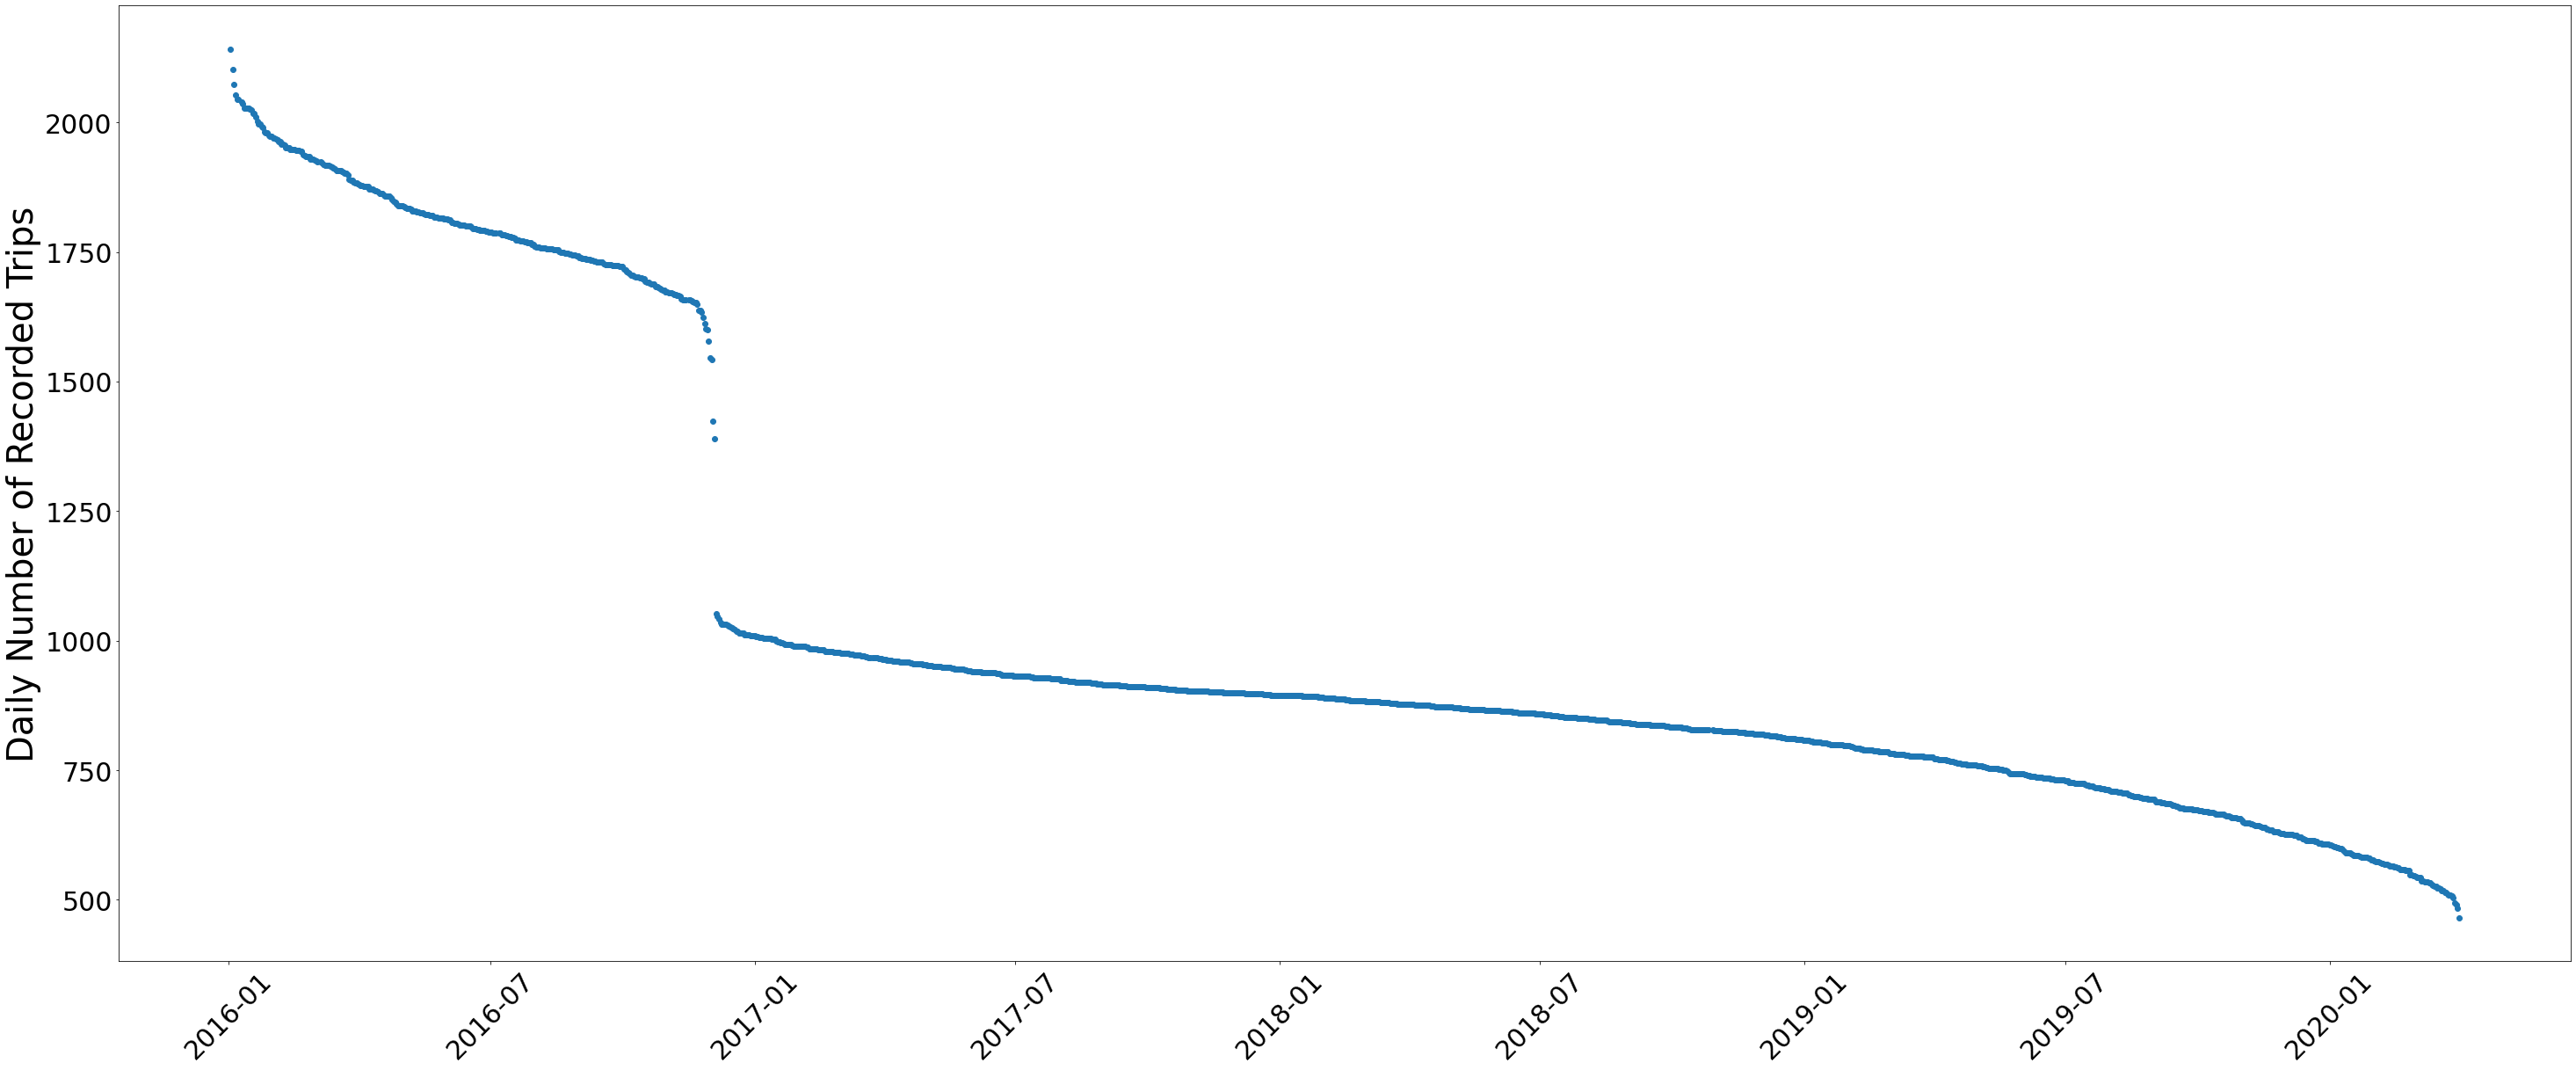

In [14]:
# Make sure that both of our axes have the same amount of datapoints
print(len(df['Date'].unique()))
print(len(df['Date'].value_counts()))

# Plot the distribution of amount of recorded daily trips (not based on time, but from day with highest amount
#     of recorded trips to day with least amount of recorded trips)
plt.figure(figsize=(50, 20))
plt.scatter(df['Date'].unique(), df['Date'].value_counts())
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)

Text(0, 0.5, 'Daily Number of Recorded Trips')

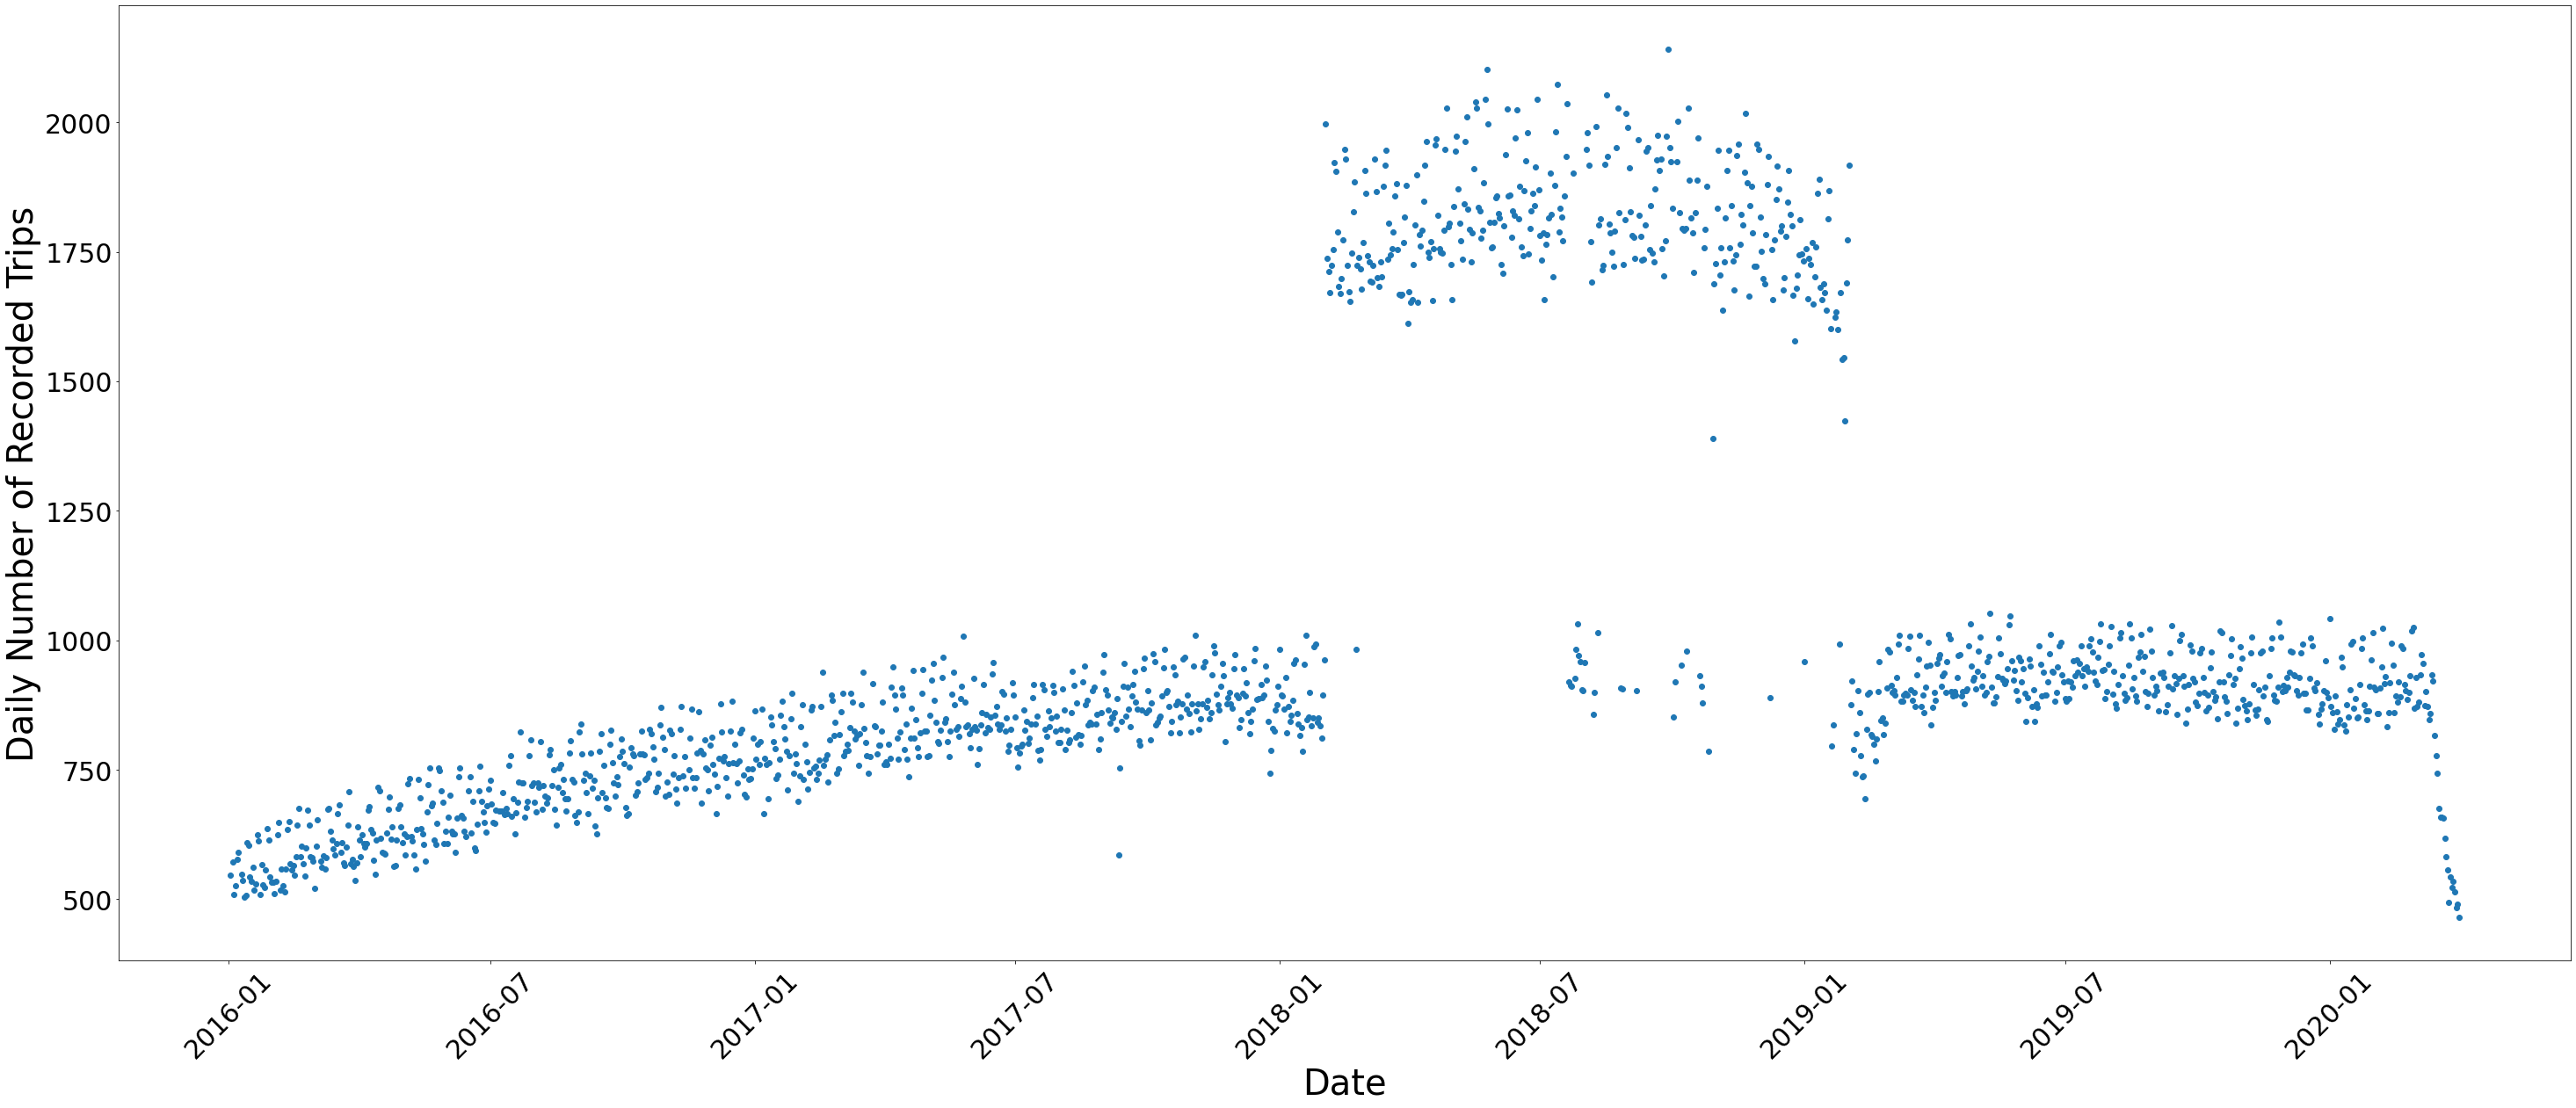

In [15]:
# Plotting the amount of recorded daily trips throught time
daily_trip_count = df.groupby('Date')['Mean Travel Time (Seconds)'].count()

plt.figure(figsize=(50,20))
plt.scatter(df['Date'].unique(), daily_trip_count)

# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)

In [16]:
df = df.rename(columns={"Mean Travel Time (Seconds)": "MeanTravelTimeSeconds"})

In [17]:
df.head()

Numeric Index Origin Movement ID Destination Movement ID       Date  \
546        1593391               1074                    1431 2016-01-02   
170        1593015               1074                     761 2016-01-02   
171        1593016               1074                     766 2016-01-02   
172        1593017               1074                     767 2016-01-02   
173        1593018               1074                     768 2016-01-02   

    MeanTravelTimeSeconds Range - Lower Bound Travel Time (Seconds)  \
546                  1400                                      1055   
170                  1095                                       845   
171                  1647                                      1223   
172                  1298                                      1124   
173                  1033                                       744   

    Range - Upper Bound Travel Time (Seconds)  
546                                      1856  
170                                      1417  
171                                      2217  
172                                      1498  
173                                      1432

In [39]:
# Create a 'DayofWeek' column
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(548)

Numeric Index Origin Movement ID Destination Movement ID       Date  \
546        1593391               1074                    1431 2016-01-02   
170        1593015               1074                     761 2016-01-02   
171        1593016               1074                     766 2016-01-02   
172        1593017               1074                     767 2016-01-02   
173        1593018               1074                     768 2016-01-02   
..             ...                ...                     ...        ...   
361        1593206               1074                    1047 2016-01-02   
360        1593205               1074                    1046 2016-01-02   
359        1593204               1074                    1045 2016-01-02   
365        1593210               1074                    1051 2016-01-02   
562            562               1074                    1357 2016-01-04   

    MeanTravelTimeSeconds Range - Lower Bound Travel Time (Seconds)  \
546                  1400                                      1055   
170                  1095                                       845   
171                  1647                                      1223   
172                  1298                                      1124   
173                  1033                                       744   
..                    ...                                       ...   
361                   902                                       625   
360                   251                                       163   
359                   532                                       394   
365                   309                                       207   
562                   834                                       725   

    Range - Upper Bound Travel Time (Seconds) DayOfWeek  
546                                      1856  Saturday  
170                                      1417  Saturday  
171                                      2217  Saturday  
172                                      1498  Saturday  
173                                      1432  Saturday  
..                                        ...       ...  
361                                      1300  Saturday  
360                                       384  Saturday  
359                                       717  Saturday  
365                                       459  Saturday  
562                                       958    Monday  

[548 rows x 8 columns]

In [40]:
df.loc[df['Date'] == '2016-01-03'].count()

Numeric Index                                0
Origin Movement ID                           0
Destination Movement ID                      0
Date                                         0
MeanTravelTimeSeconds                        0
Range - Lower Bound Travel Time (Seconds)    0
Range - Upper Bound Travel Time (Seconds)    0
DayOfWeek                                    0
dtype: int64